# Quantum Teleportation Protocol

## Teleporting an entangled qubit - Simulation

In [2]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import transpile
from qiskit.result import Counts, marginal_counts
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.providers.aer import StatevectorSimulator, QasmSimulator

In [3]:
def create_random_data_qubit(dimensions: int) -> Statevector:
    return random_statevector(dimensions)

In [49]:
def create_bell_pair(qc: QuantumCircuit, a: QuantumRegister, b: QuantumRegister) -> None:
    qc.barrier()
    qc.h(a)
    qc.cx(a, b)

def create_two_bell_pairs(qc: QuantumCircuit, a: QuantumRegister, b: QuantumRegister) -> None:
    qc.barrier()
    qc.h(a[0])
    qc.h(b[0])
    qc.cx(a[0], a[1])
    qc.cx(b[0], b[1])

In [5]:
def bell_state_operation(qc: QuantumCircuit, d: QuantumRegister, a: QuantumRegister) -> None:
    qc.barrier()
    qc.cx(d, a)
    qc.h(d)

In [6]:
def bell_state_measurement(qc: QuantumCircuit, a: QuantumRegister, b: QuantumRegister) -> None:
    qc.barrier()
    qc.measure(a, 0)
    qc.measure(b, 1)

In [7]:
def pauli_correction_operation(qc: QuantumCircuit, b: QuantumRegister, crz: ClassicalRegister, crx: ClassicalRegister) -> None:
    # Apply the gates if the registers are in the state '1'
    qc.barrier()
    qc.x(b).c_if(crx, 1)
    qc.z(b).c_if(crz, 1)

In [11]:
def statevector_simulation(qc: QuantumCircuit) -> Statevector:
    statevector_sim: StatevectorSimulator = StatevectorSimulator()
    # qc.save_statevector()
    return statevector_sim.run(qc).result().get_statevector()

In [12]:
def qasm_count_simulation(qc: QuantumCircuit) -> Counts:
    qasm_sim: QasmSimulator = QasmSimulator()
    t_qc = transpile(qc, qasm_sim)
    # t_qc.save_statevector()
    return qasm_sim.run(t_qc).result().get_counts()

In [50]:
# data: QuantumRegister = QuantumRegister(1, "data")

alice: QuantumRegister = QuantumRegister(2, "alice")
bob: QuantumRegister = QuantumRegister(2, "bob")

crz: ClassicalRegister = ClassicalRegister(1, "crz")
crx: ClassicalRegister = ClassicalRegister(1, "crx")

coz: ClassicalRegister = ClassicalRegister(1, "coz")

qc: QuantumCircuit = QuantumCircuit(alice, bob, crz, crx, coz)

In [51]:
create_two_bell_pairs(qc, alice, bob)
# create_bell_pair(qc, alice[0], alice[1])
# create_bell_pair(qc, bob[0], bob[1])

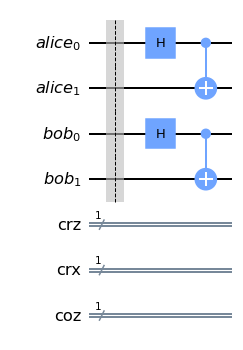

In [52]:
qc.draw("mpl")